In [78]:
%matplotlib inline
from matplotlib import style
from matplotlib import figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [79]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [81]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [82]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [83]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [84]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [85]:
# Let's use inspector, connect it to the engine, and see the tables.
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [86]:
# Get a list of column names and types for the measurement db
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [87]:
# Get a list of column names and types for the station db
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [88]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [89]:
# Take a peek at what is in the measurement db
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [90]:
# Take a peek at what is in the station db
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [91]:
# Find the most recent date in the data set.

In [92]:
# Let's see the latest or the most recent date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# We saw the most recent data was '2017-08-23'

# Calculate the date one year from the last date in data set.
# Use the datetime library we will use 365 days.
date_query = dt.date(2017,8,23) - dt.timedelta(days=365)
print(f"Date Query: {date_query}")

Date Query: 2016-08-23


In [94]:
# Perform a query to retrieve the data and precipitation scores
precip_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_query).all()
precip_scores

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [95]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_scores, columns = ['date', 'prcp'])
precip_df.set_index('date', inplace=True)
precip_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [96]:
# Let's first rename the prcp column to precipitation
precip_df = precip_df.rename(columns={'prcp':'precipitation'})
precip_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [97]:
# Sort the dataframe by date
precip_df = precip_df.sort_values('date') #.dropna()
precip_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


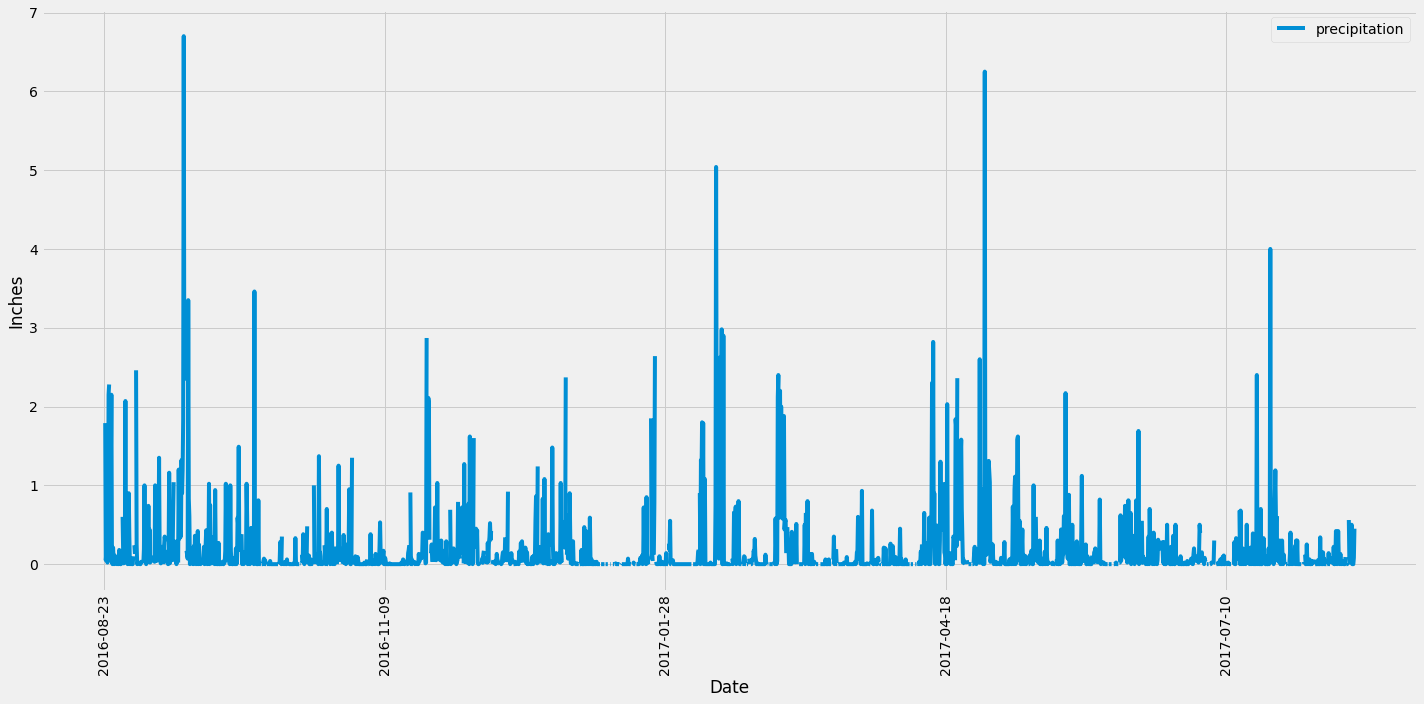

In [98]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = precip_df.plot(figsize=(20,10), rot=90)
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig("./Images/Precipation (in) vs. Date.png")
plt.show()

In [99]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [100]:
# Design a query to calculate the total number stations in the dataset
station_cnt = session.query(Station.id).count()
print(f'The total number of stations is: {station_cnt}')

The total number of stations is: 9


In [101]:
# Design a query to find the most active stations 
# (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
all_active_stations = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by((func.count(Measurement.station)).desc()).all()

for each in all_active_stations:
    print(each)


('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [102]:
# Using the most active station id from the previous query, 
# calculate the lowest, highest, and average temperature.
# The most active station id is USC00519281 as determined in above
# section.

# Use the [0][0] element to get the station ID with the most active
# or most rows
most_active_id = all_active_stations[0][0]
print(f'The most active station id is: {most_active_id}')

session.query(func.min(Measurement.tobs), 
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).\
            filter(Measurement.station == most_active_id).all()


The most active station id is: USC00519281


[(54.0, 85.0, 71.66378066378067)]

In [103]:
# Using the most active station id
# Query the last 12 months of temperature observation data 
temp_observed_data = session.query(Measurement.date, Measurement.tobs).\
                            filter(Measurement.date >= date_query).\
                            filter(Measurement.station == most_active_id).all()
#temp_observed

In [104]:
# Let's make the above results to a DataFrame
temp_obs_data_df = pd.DataFrame(temp_observed_data, columns = ['date', 'tobs'])
temp_obs_data_df.head(10)


,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
5,2016-08-28,73.0
6,2016-08-29,78.0
7,2016-08-30,77.0
8,2016-08-31,78.0
9,2016-09-01,80.0


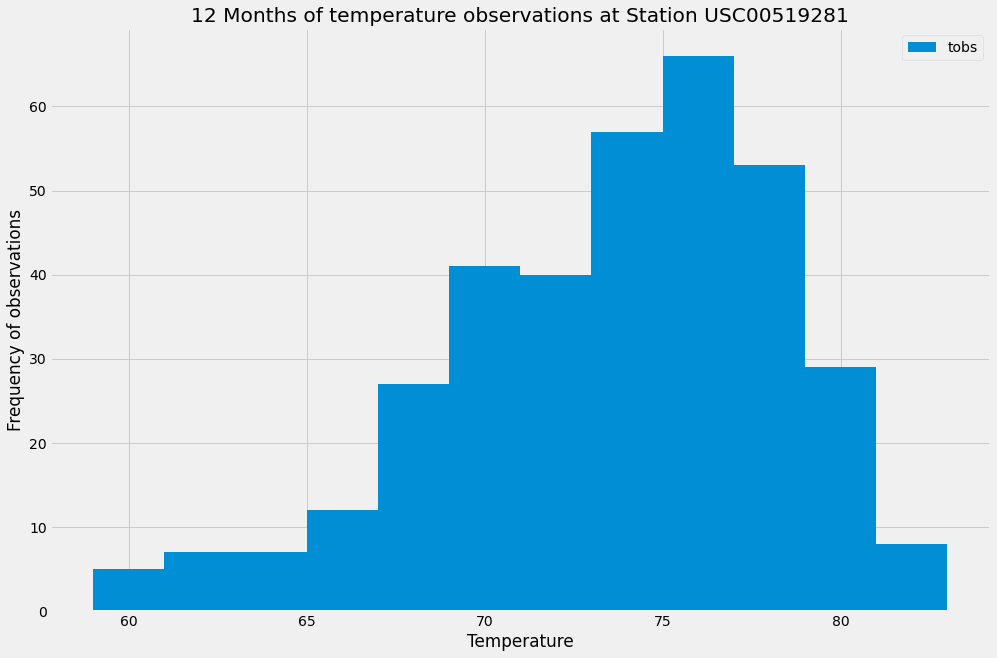

In [120]:
# For the station with the most observation plot the results as a histogram
# That station id was determined earlier to be USC00519281
temp_obs_data_df.plot.hist(bins=12, figsize =(15,10))
plt.xlabel("Temperature")
plt.ylabel("Frequency of observations")
plt.title(f"12 Months of temperature observations at Station {all_active_stations[0][0]}")
plt.savefig("./Images/12 Months of Temperature Observations.png")
plt.show()


# Close session

In [121]:
# Close Session
session.close()